In [29]:
import numpy as np
import pandas as pd 
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
from ipywidgets import interactive
import warnings
warnings.simplefilter(action='ignore')

In [30]:
wine = datasets.load_wine()

In [31]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [32]:
df['classes']=wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [33]:
# TASK 1
print('The classes are: ',df['classes'].unique())

The classes are:  [0 1 2]


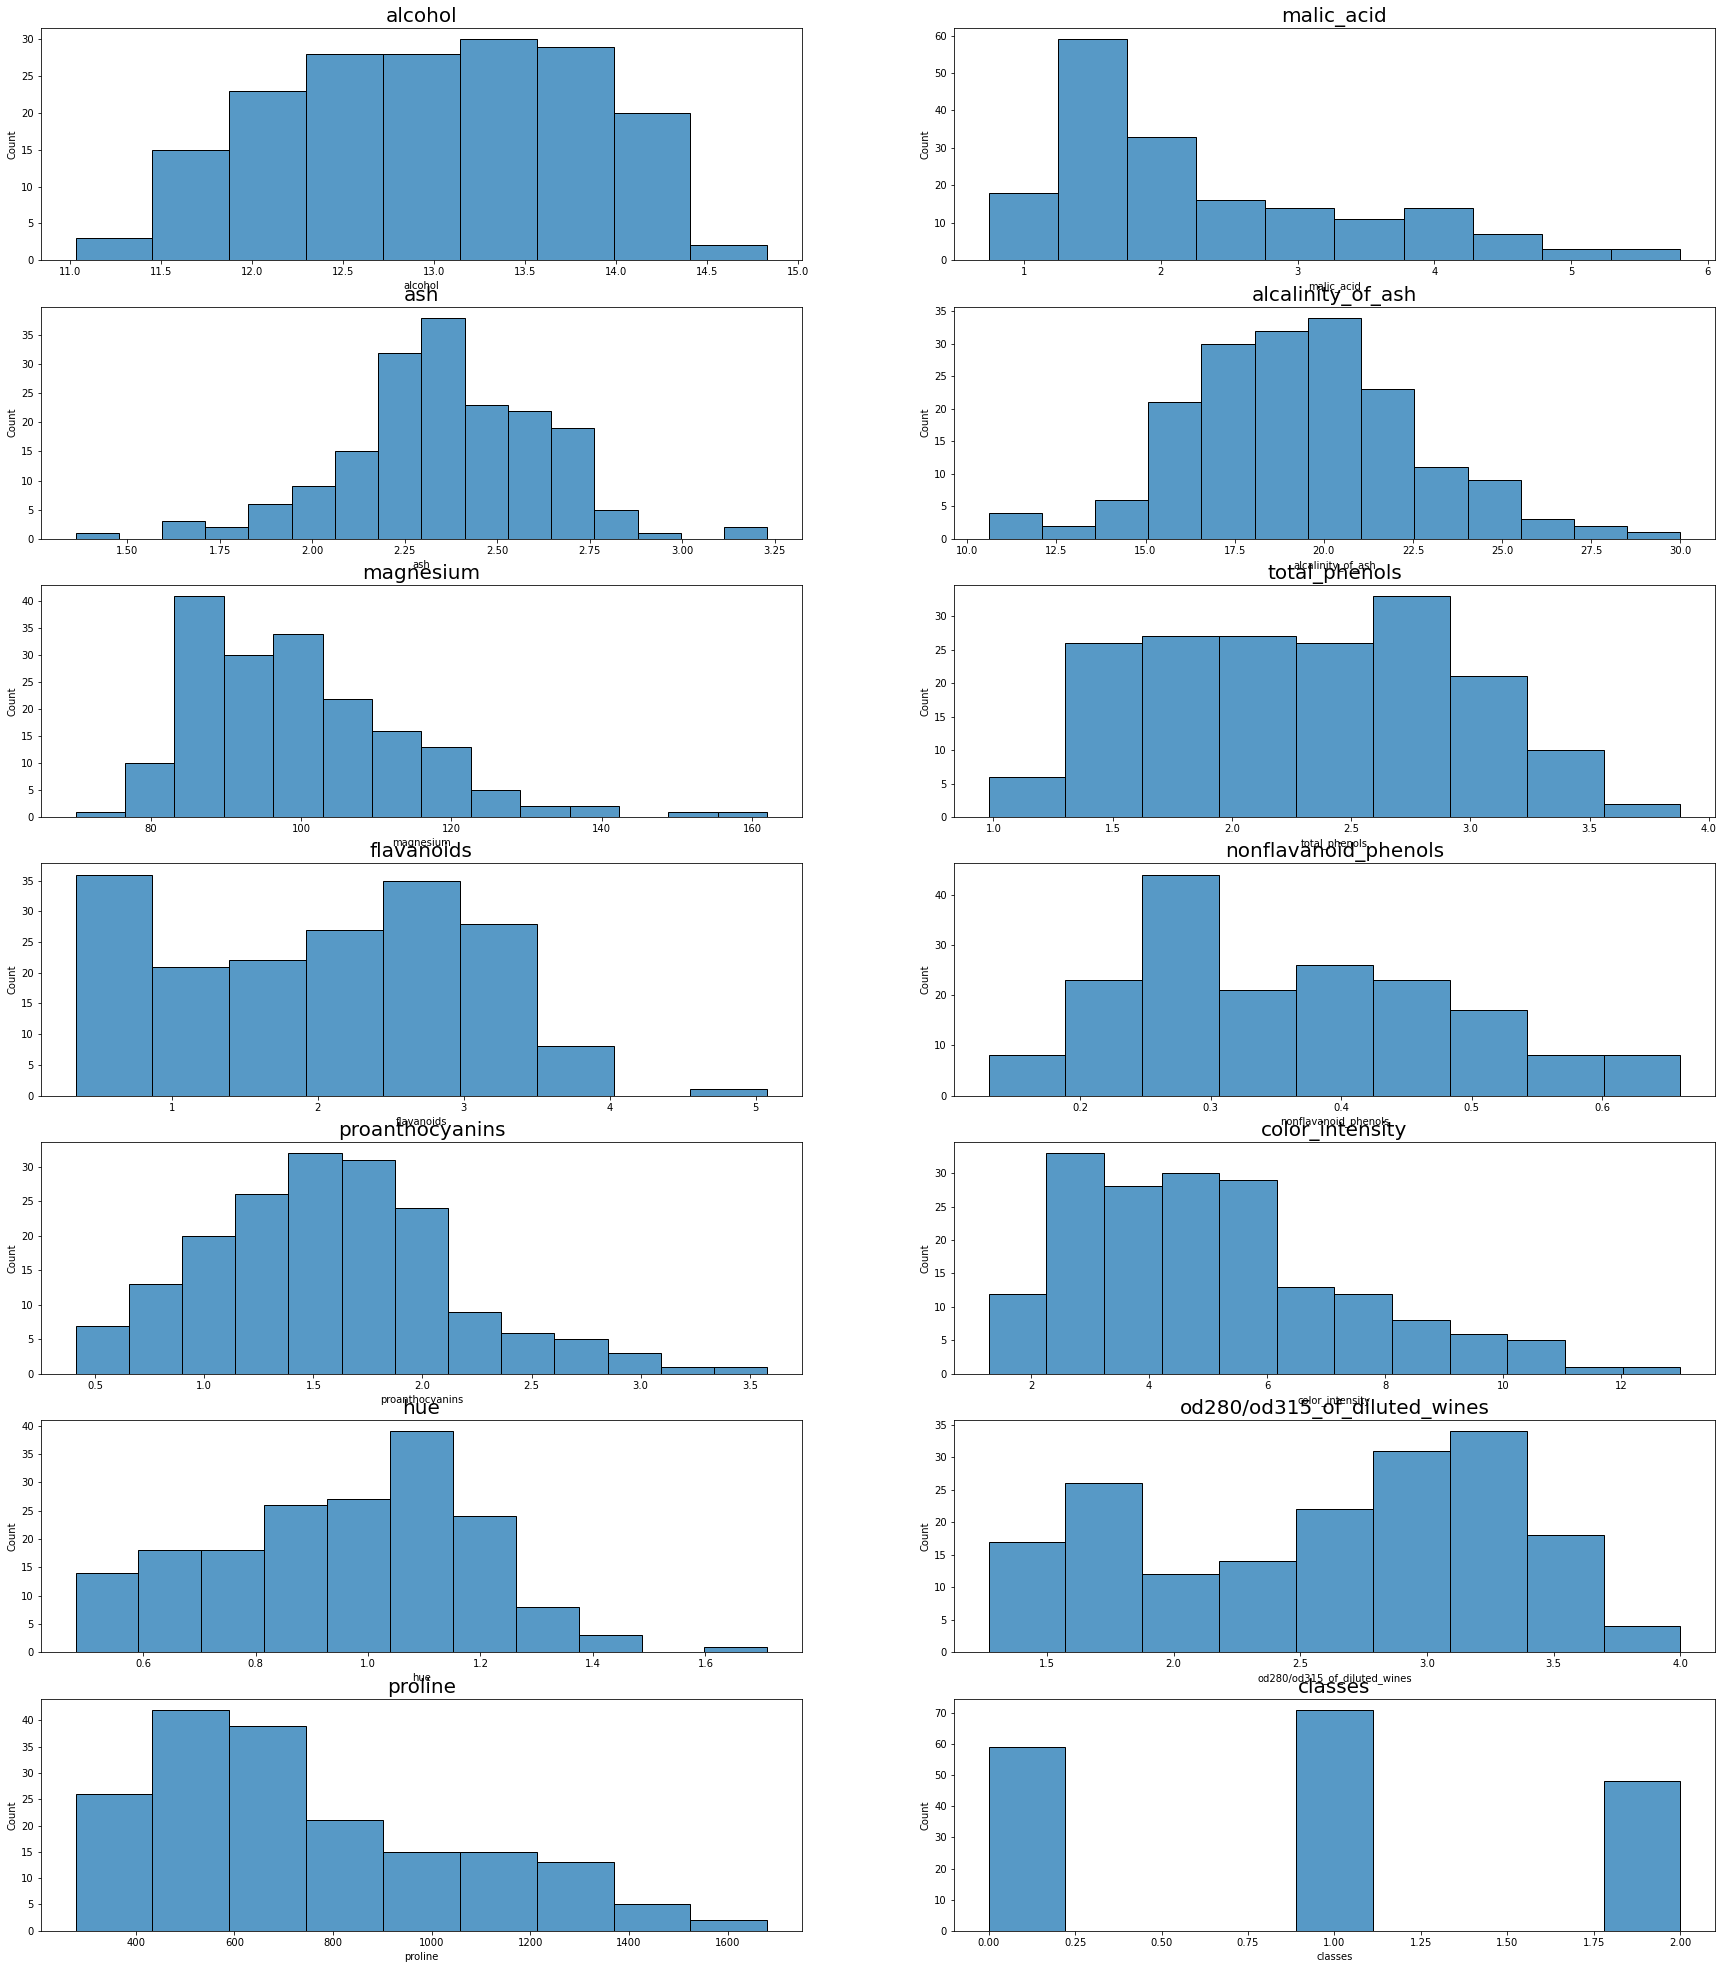

In [34]:
import seaborn as sns
n=list(enumerate(df.columns))
plt.figure(figsize=(30,35))
for x in n:
    plt.subplot(7,2,x[0]+1)
    sns.histplot(x=x[1],data=df)
    plt.title(f"{x[1]}",fontsize=20)
plt.show()

In [35]:
print("Number of Instances:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Instances: 178
Number of Features: 14


In [105]:
# TASK 2
from sklearn.model_selection import train_test_split
X_data = df.iloc[:,0:13]
Y_data = df.iloc[:,13:]
X_train, X_test, Y_train, Y_test = \
train_test_split(X_data, Y_data, test_size=0.2, random_state=31)


In [106]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler  
norm=MinMaxScaler().fit(X_data).transform(X_data)
norm

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [107]:
scaled = StandardScaler().fit(norm)
scaled

StandardScaler()

In [108]:
scaled_df = scaled.transform(norm)
scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [109]:
scaled_df= pd.DataFrame(scaled_df)
scaled_df.columns=wine.feature_names
scaled_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [110]:
scaled_train, scaled_test = train_test_split(scaled_df,train_size = 0.8, random_state= 31)

In [111]:
# TASK 3
from sklearn import neighbors
from sklearn.metrics import accuracy_score
clf = neighbors.KNeighborsClassifier(5)
clf.fit(scaled_train, Y_train)
prediction = clf.predict(scaled_test)
pred= pd.DataFrame(prediction)
clf.score(scaled_test,Y_test)

0.9166666666666666

In [112]:
for x in range(1,21):
    clf = neighbors.KNeighborsClassifier(x)
    clf.fit(scaled_train, Y_train)
    prediction = clf.predict(scaled_test)
    pred= pd.DataFrame(prediction)
    print(x,clf.score(scaled_test,Y_test))

1 0.8888888888888888
2 0.8611111111111112
3 0.9166666666666666
4 0.8888888888888888
5 0.9166666666666666
6 0.8333333333333334
7 0.8888888888888888
8 0.8888888888888888
9 0.9166666666666666
10 0.8888888888888888
11 0.8888888888888888
12 0.8611111111111112
13 0.8611111111111112
14 0.8888888888888888
15 0.9166666666666666
16 0.8888888888888888
17 0.9166666666666666
18 0.8888888888888888
19 0.9166666666666666
20 0.8611111111111112


In [122]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(scaled_train, Y_train)
prediction = clf.predict(scaled_test)
pred= pd.DataFrame(prediction)
print(clf.score(scaled_test,Y_test))

0.9166666666666666


In [150]:
print('The wrong values are:')
for i in range(len(pred)):
    if pred[0][i] != Y_test1.iloc[i,1]:
        print(i,' ',pred[0][i],' ',Y_test1.iloc[i,1])

The wrong values are:
8   2   1
12   0   1
25   0   1


In [151]:
# TASK 4
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(scaled_train, Y_train)

GaussianNB()

In [152]:
pred1=gnb.predict(scaled_test)
pred1

array([1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2])

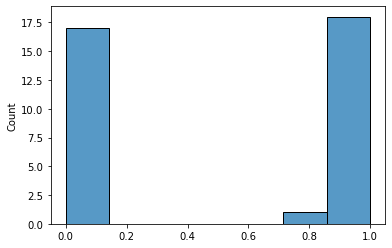

In [154]:
sns.histplot(data=gnb.predict_proba(scaled_test)[:,1])
plt.show()